In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-who/Life Expectancy Data.csv


In [2]:
# Load our dataset
dataset = pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')
# Show a simple statistical description
dataset.describe()
# Show the number of rows and columns/features
dataset.shape

(2938, 22)

In [3]:
# Show the low-level type description of the frame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
# Show the number of NaN
dataset.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
# This is the code we used in the workshop, but the check above to see the
# number of NaNs show that this isn't a viable approach
#dataset.fillna(0.0, inplace=True)

# Drop all rows with NaNs
dataset.dropna(axis=0, inplace=True)

# Show the new number of rows after removing all NaNs
dataset.shape

(1649, 22)

In [6]:
# Encode the entire dataset (all features with object type) using one-hot encoding
dataset_encoded = pd.get_dummies(dataset)

# Show the keys of the encoded dataset. Note that the target feature has an extra space at the end
dataset_encoded.keys()

# Separate features from target
features = dataset_encoded.drop('Life expectancy ', axis=1)
targets = dataset_encoded['Life expectancy ']

# Show the first features (encoded)
features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,0,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,0,0,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into train and test (0.75/0.25 train/test). Shuffle the data
features_train, features_test, targets_train, targets_test = train_test_split(features, targets, shuffle=True)

In [8]:
from sklearn.linear_model import Ridge

# Create a ridge regressor with default parameters and fit it to our data
ridge = Ridge()
ridge.fit(features_train, targets_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.61576e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge()

In [9]:
# Show the R Squared score for both train and test data. Measures how much
# of the variation in the dependent variable (the target) is explained by the
# model (1.0 is the best score, but it can be negative if the mean of the dependent
# variable better explains the variable than the model)
(ridge.score(features_train, targets_train), ridge.score(features_test, targets_test))

(0.9583720353814892, 0.9529836668223086)

In [10]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regressor with max depth of 4 and fit it 
# to our data
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(features_train, targets_train)

# Show the R Squared (Coefficient of determination) on both train and test data
(tree.score(features_train, targets_train), tree.score(features_test, targets_test))

(0.8996662619410406, 0.8691801403594737)

[Text(0.5, 0.9, 'X[17] <= 0.544\nsquared_error = 76.208\nsamples = 1236\nvalue = 69.328'),
 Text(0.25, 0.7, 'X[12] <= 1.65\nsquared_error = 43.143\nsamples = 345\nvalue = 59.048'),
 Text(0.125, 0.5, 'X[1] <= 250.0\nsquared_error = 18.482\nsamples = 185\nvalue = 63.323'),
 Text(0.0625, 0.3, 'X[18] <= 11.25\nsquared_error = 10.137\nsamples = 121\nvalue = 65.345'),
 Text(0.03125, 0.1, 'squared_error = 7.305\nsamples = 110\nvalue = 64.849'),
 Text(0.09375, 0.1, 'squared_error = 11.354\nsamples = 11\nvalue = 70.309'),
 Text(0.1875, 0.3, 'X[10] <= 10.245\nsquared_error = 11.911\nsamples = 64\nvalue = 59.5'),
 Text(0.15625, 0.1, 'squared_error = 6.678\nsamples = 61\nvalue = 60.021'),
 Text(0.21875, 0.1, 'squared_error = 0.427\nsamples = 3\nvalue = 48.9'),
 Text(0.375, 0.5, 'X[12] <= 16.25\nsquared_error = 26.09\nsamples = 160\nvalue = 54.105'),
 Text(0.3125, 0.3, 'X[1] <= 351.0\nsquared_error = 14.89\nsamples = 128\nvalue = 55.904'),
 Text(0.28125, 0.1, 'squared_error = 12.631\nsamples = 69\n

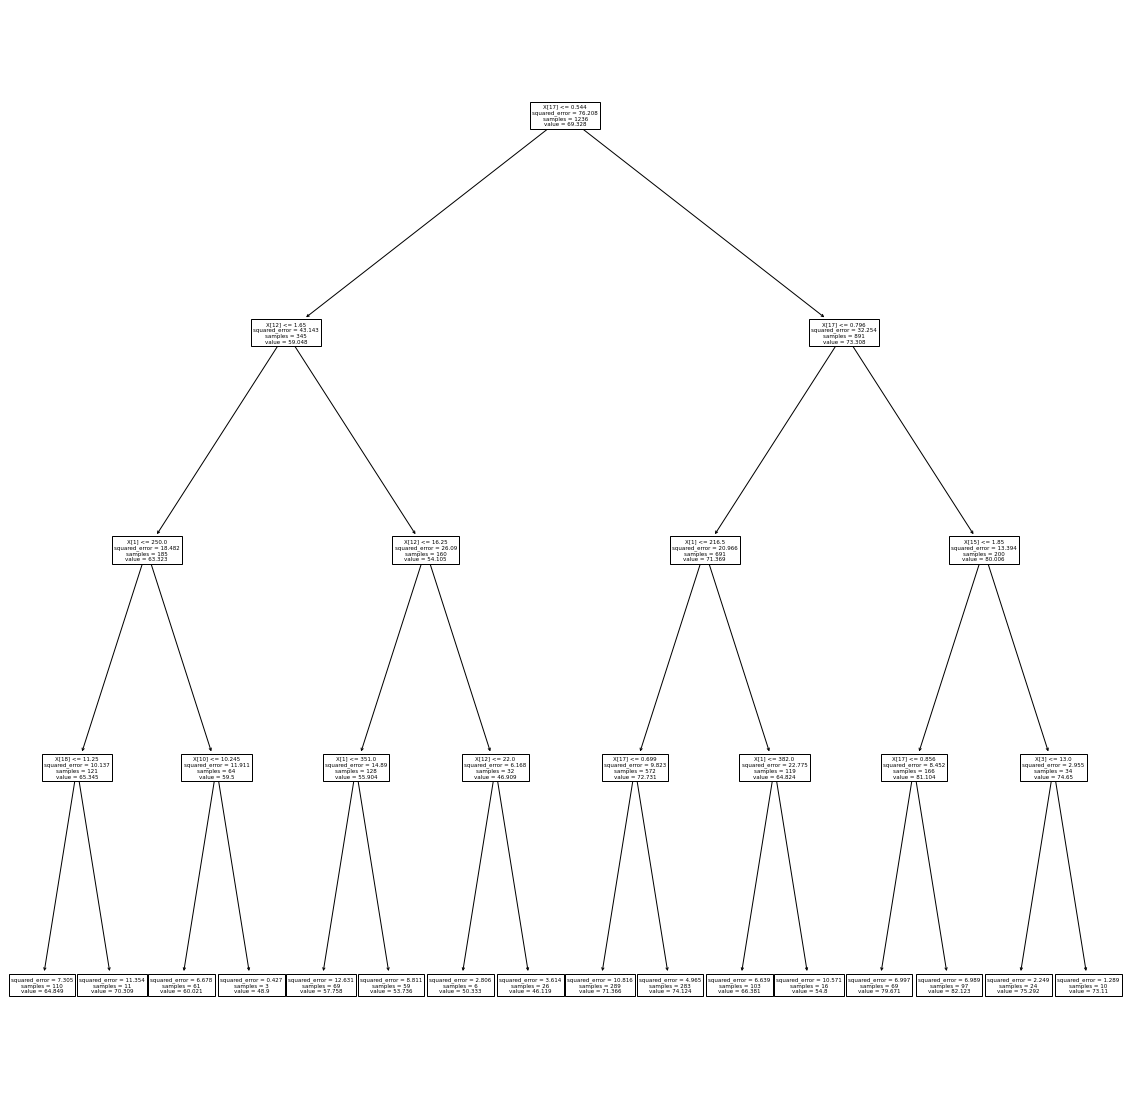

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Show the decision tree
plt.figure(figsize=(20,20))
plot_tree(tree)

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor with 100 trees and fit it to our data
forest = RandomForestRegressor(n_estimators=100)
forest.fit(features_train, targets_train)

# Show the R Squared (Coefficient of determination) on both train and test data
(forest.score(features_train, targets_train), forest.score(features_test, targets_test))

(0.9937351613111537, 0.9582630392877349)

In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with mean scaling and a Multilayer Perceptron with default
# parameters. The normalization is essential for the regressor to work
mlp = make_pipeline(StandardScaler(),MLPRegressor())
mlp.fit(features_train, targets_train)

# Show the R Squared (Coefficient of determination) on both train and test data
(mlp.score(features_train, targets_train), mlp.score(features_test, targets_test))

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.9502836755106898, 0.920410774110845)

In [14]:
# Show the number of rows and columns of our features to use
# when creating our Keras NN
features_train.shape

(1236, 154)

In [15]:
import tensorflow.keras.backend as kb

# Keras doesn't include R Squared metrics out of the box, so we have to create
# our own.
# This function is direct implementation of the equation 
# given in the lecture slides
def coeff_determination(y_true, y_pred):
    ss_res =  kb.sum(kb.square( y_true-y_pred ))
    ss_tot = kb.sum(kb.square( y_true - kb.mean(y_true) ) ) 
    return ( 1 - ss_res/(ss_tot + kb.epsilon()) )

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization

# Create a normalization layer with the approprate input shape
normalize = Normalization(input_shape=[154,])
# Fit it to our training data. This is the same as happening in our 
# sklearn MLP regressor
normalize.adapt(features_train)

# Create our network. The top layer is the normilation layer, Then a fully connected layer with the same
# input size. Then a fully connected hidden layer with 100 neurons. Finally, a single output neuron with 
# activation function
keras = Sequential([normalize, Dense(154, activation='relu'),Dense(100, activation='relu'), Dense(1)])
# Specify the loss function (MSE) and the metrics to use [R Squared]
keras.compile(loss='mean_squared_error', metrics=[coeff_determination])
# Train our network with 20 iterations through our dataset
keras.fit(x=features_train, y=targets_train,epochs=20)

# Evaluate the performance of the network on test data. This will print both MSE and R Squared
keras.evaluate(x=features_test, y=targets_test,)

2022-11-14 18:54:19.169716: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-14 18:54:19.284241: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
39/39 [==============================] - 1s 2ms/step - loss: 2675.5625 - coeff_determination: -36.5063
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 181.1484 - coeff_determination: -1.7723
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 12.4187 - coeff_determination: 0.8181
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 6.9561 - coeff_determination: 0.8986
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 5.7511 - coeff_determination: 0.9141
Epoch 6/20
39/39 [==============================] - 0s 2ms/step - loss: 5.2128 - coeff_determination: 0.9278
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 4.8901 - coeff_determination: 0.9282
Epoch 8/20
39/39 [==============================] - 0s 2ms/step - loss: 4.6226 - coeff_determination: 0.9330
Epoch 9/20
39/39 [==============================] - 0s 2ms/step - loss: 4.3386 - coeff_determination: 0.9379
Epoch 10/2

[5.664446830749512, 0.9262592792510986]